In [1]:
import numpy as np
from numpy import linalg
import csv, math
import matplotlib.pyplot as plt
%matplotlib inline
import os

def read_x_y(fname):
    f = open(fname, 'r')
    reader = csv.reader(f)
    positions = []
    for row in reader:
        positions.append( [round(float(row[1]),1), round(-float(row[2]),1) + 300, False] )
    return positions

def dist(a,b):
    x1,y1,AUX = a[0],a[1],a[2]
    x2,y2,AUX = b[0],b[1],b[2]
    return math.sqrt(math.pow((x1-x2),2) + math.pow((y1-y2),2))

def getAveragePositions(positions):
    averagex = []
    averagey = []
    nearestx = []
    nearesty = []
    for i in range (len(positions)):
        point1 = positions[i]
        positions[i][2] = True
        for j in range(i+1,len(positions)):
            if (positions[j][2] == False):
                point2 = positions[j]
                if(dist(point1,point2) < 50):            
                    # Append it to the nearest list
                    nearestx.append(point2[0])
                    nearesty.append(point2[1])
                    if(j < len(positions)-1):
                        positions[j][2] = True
            if(len(nearestx) > 90):
                averagex.append(np.mean(nearestx))
                averagey.append(np.mean(nearesty))
                #print('nearestx ---- '+str(len(nearestx)))
                nearestx = []
                nearesty = []
    print(len(averagex))
    return averagex, averagey

'''
Class point object for positional information
'''


class Vector(object):
    def __init__(self, x, y, x2, y2):
        self.visit = False
        self.points = np.array([[x, y], [x2, y2]])
        self.vector = np.array([x2-x,y2-y])
        self.magnitude = self.calc_magnitude()
        
    def __str__(self):
        return str(self.vector)
    
    def get_distance(self,b):
        return np.sqrt(np.sum((b.points[0] - self.points[0]) ** 2))
    
    def get_xy(self):
        return self.points[0][0], self.points[0][1]
    
    def get_magnitude(self):
        return self.magnitude
    def angle(self):
        return cos
    def calc_magnitude(self):
        return np.sqrt(np.sum((self.points[1] - self.points[0]) ** 2))
    def calc_projection(self,b):
        p = (np.dot(b.vector,self.vector))/(self.magnitude**2)
        return p
    def visited(self):
        self.visit = True
    def isVisited(self):
        return self.visit

class Path(object):
    def __init__(self,name):
        self.name = name
        self.vectors = []
        size = 0
        
    def get_vector(self,ix): 
        return self.vectors[ix]
    
    def add_vector(self,x, y, x2, y2):
        new_vector = Vector(x, y, x2, y2)
        self.vectors.append(new_vector)
        
    def add_positions(self,X,Y):
        self.size = len(X)
        for i in range(len(X)-1):
            self.add_vector(X[i],Y[i],X[i+1],Y[i+1])
    
    def distance(self,b):
        a_x,a_y = a.points[0][0],a.points[0][1]
        b_x,b_y = b.points[0][0],b.points[0][1]
        
    def compare_path(self,path2):
        differences = []
        for a in self.vectors:
            minDist = 10000000
            closest = None
            for b in path2.vectors:
                if (a.get_distance(b) < minDist and not(b.visit)):
                    minDist = a.get_distance(b)
                    closest = b
            if closest != None:
                closest.visit = True
                a1 = a.calc_projection(closest)
                a2 = np.sqrt((closest.magnitude**2)-(a1**2))
                if not(np.isnan(a2)):
                    differences.append(a2)
        return differences
                    
    def reset_visited(self):
        for v in self.vectors:
            v.visited = False

# Measuring positions of the vehicle
The code snippets below take CSV files from positional video recordings of the remote control car. In this notebook we will analyze the vehicles positions on different tracks.

Calculate average x, y positions of the tracks=
* does the mean of the robot path, is it or not different thatn the human path
* Student tea test, demonstrate normality - is it normal
* null hypothesis, assume that the mean robot error

In [38]:
import os

cwd = os.getcwd()
directory = cwd+'/csvs/circuitcsv/'
rnn,rnncat, linear, cat, human = [],[],[],[],[]

for filename in os.listdir(directory):
    if filename.endswith(".csv") or filename.endswith(".py"): 
        #print(os.path.join(directory, filename))
        fdir = os.path.join(directory, filename)
        if 'rnncat' in  filename:
            rnncat.append(read_x_y(str(fdir)))
            pass
        if 'cat' in filename:
            cat.append(read_x_y(str(fdir)))
            pass
        if 'linear' in filename:
            linear.append(read_x_y(str(fdir)))
            pass
        if 'rnn' in filename:
            rnn.append(read_x_y(str(fdir)))
            pass
        if 'human' in filename:
            human.append(read_x_y(str(fdir)))
            pass
        pass
    else:
        continue
pass

### Categorical - Average Positions

In [3]:
pos = cat
if(len(pos) != 0):
    print("== cat")
    totalpos = []
    for i in range(len(pos)):
        #print("---- "+str(len(pos[i])))
        totalpos.extend(pos[i])
    catx,caty = getAveragePositions(totalpos)

== cat
160


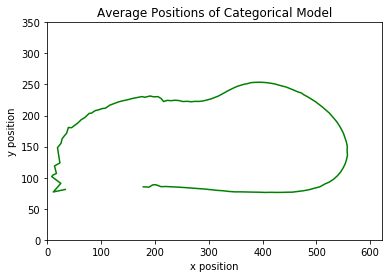

In [4]:
n=8
catx = catx[15:len(catx)-n]
caty = caty[15:len(caty)-n]

#plt.plot(catx[:len(linearx)-n],lineary[:len(lineary)-n],c='red')
plt.plot(catx,caty, c='green')
plt.xlim(0, 622)
plt.ylim(0, 350)     # set the ylim to ymin, ymax
plt.title('Average Positions of Categorical Model')
plt.xlabel('x position')
plt.ylabel('y position')
plt.show()

### Linear - Average Positions

In [5]:
pos = linear
if(len(pos) != 0):
    print("== linear")
    totalpos = []
    for i in range(len(pos)):
        #print("---- "+str(len(pos[i])))
        totalpos.extend(pos[i])
    linearx,lineary = getAveragePositions(totalpos)
linearx = linearx[4:]
lineary = lineary[4:]

== linear
41


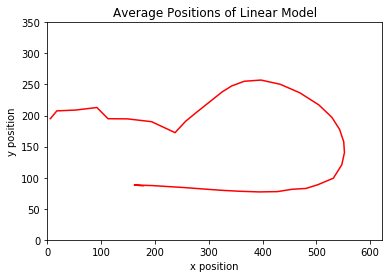

In [70]:
n=0
plt.plot(linearx[:len(linearx)-n],lineary[:len(lineary)-n],c='red')
plt.xlim(0, 622)
plt.ylim(0, 350)     # set the ylim to ymin, ymax
plt.title('Average Positions of Linear Model')
plt.xlabel('x position')
plt.ylabel('y position')
plt.show()

### Human - Average Positions

In [7]:
pos = human
if(len(pos) != 0):
    print('== human')
    totalpos = []
    for i in range(len(pos)):
        totalpos.extend(pos[i])
    hx,hy = getAveragePositions(totalpos)
n=5
hx = hx[:len(hx)-n]
hy = hy[:len(hy)-n]

== human
67


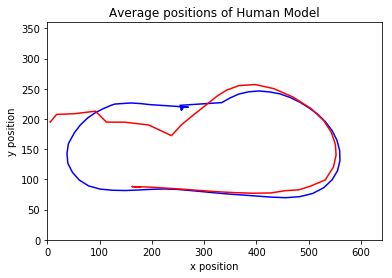

In [8]:
plt.plot(hx,hy,c='b')
#plt.plot(linearx[:len(linearx)-n],lineary[:len(lineary)-n],c='red')
plt.plot(linearx,lineary,c='red')
plt.xlim(0, 1920/3)
plt.ylim(0, 1080/3)     # set the ylim to ymin, ymax
plt.title('Average positions of Human Model')
plt.xlabel('x position')
plt.ylabel('y position')
plt.show()

### RNN Single Output Model

In [39]:
pos = rnn
if(len(pos) != 0):
    print('== rnn')
    totalpos = []
    for i in range(len(pos)):
        totalpos.extend(pos[i])
    rnnx,rnny = getAveragePositions(totalpos)


== rnn
234


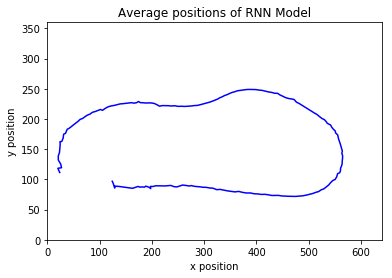

In [41]:
n=18
s=9
plt.plot(rnnx[s:len(rnnx)-n],rnny[s:len(rnnx)-n],c='b')

plt.xlim(0, 1920/3)
plt.ylim(0, 1080/3)     # set the ylim to ymin, ymax
plt.title('Average positions of RNN Model')
plt.xlabel('x position')
plt.ylabel('y position')
plt.show()

### RNN Categorical Output

In [40]:
pos = rnncat
if(len(pos) != 0):
    print('== rnn')
    totalpos = []
    for i in range(len(pos)):
        totalpos.extend(pos[i])
    rnncatx,rnncaty = getAveragePositions(totalpos)


== rnn
90


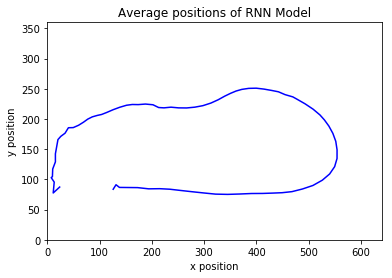

In [54]:
n=4
s=6
plt.plot(rnncatx[s:len(rnncatx)-n],rnncaty[s:len(rnncaty)-n],c='b')

plt.xlim(0, 1920/3)
plt.ylim(0, 1080/3)     # set the ylim to ymin, ymax
plt.title('Average positions of RNN Model')
plt.xlabel('x position')
plt.ylabel('y position')
plt.show()

## Calculating Error from Human Drive

Now calculating the average mean error from the human driver

This section will calculate difference between position of vehicle of human model vs categorical

In [6]:
pos = human
if(len(pos) != 0):
    totalpos = []
    for i in range(len(pos)):
        totalpos.extend(pos[i])
    hx,hy = getAveragePositions(totalpos)

67


In [103]:
cat_path = Path('Categorical')
cat_path.add_positions(catx,caty)

linear_path = Path('Linear')
linear_path.add_positions(linearx,lineary)

rnn_path = Path('RNN')
rnn_path.add_positions(rnnx,rnny)

rnncat_path = Path('RNN Categorical')
rnncat_path.add_positions(rnncatx,rnncaty)

human_path = Path('human')
human_path.add_positions(hx,hy)

In [ ]:
diff_human_cat = human_path.compare_path(cat_path)

Text(0.5,1,'Categorical Model')

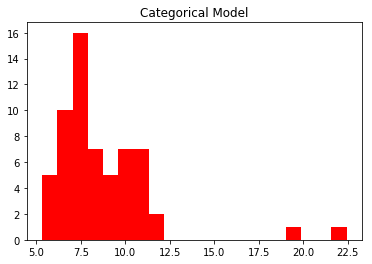

In [136]:
plt.hist(diff_human_cat, bins=20, color='r')  # arguments are passed to np.histogram
plt.title("Categorical Model")
#plt.xlim([0,100])
#plt.show()

In [104]:
diff_linear_human = human_path.compare_path(linear_path)

Text(0.5,1,'Linear Model')

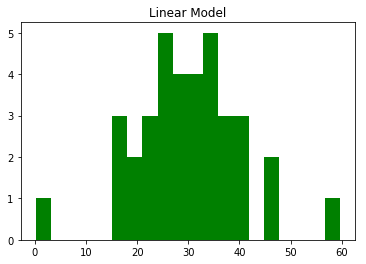

In [137]:
plt.hist(diff_linear_human, bins=20,color='g')  # arguments are passed to np.histogram
plt.title("Linear Model")
#plt.xlim([0,100])
#plt.show()

In [110]:
diff_rnn_human = human_path.compare_path(rnn_path)

Text(0.5,1,'RNN Model')

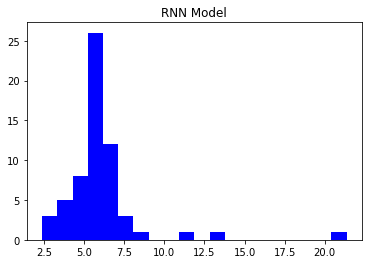

In [138]:
plt.hist(diff_rnn_human, bins=20,color='b')  # arguments are passed to np.histogram
plt.title("RNN Model")
#plt.xlim([0,100])
#plt.show()

In [113]:
diff_rnn_linear = human_path.compare_path(rnncat_path)

16.683265970175043


Text(0.5,1,'RNN Categorical')

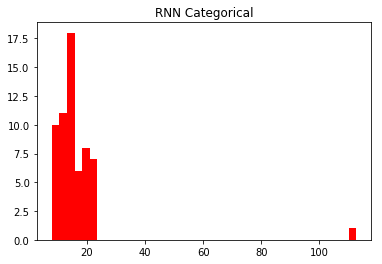

In [145]:
print(np.mean(diff_rnn_linear))

plt.hist(diff_rnn_linear, bins=40,color='red')  # arguments are passed to np.histogram
plt.title("RNN Categorical")
#plt.xlim([0,100])
#plt.show()

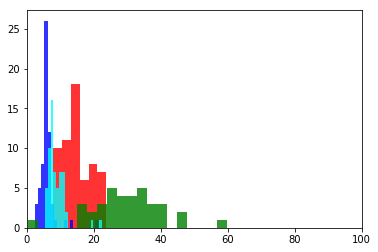

In [150]:
plt.hist(diff_rnn_linear, bins=40,color='red',alpha = 0.8)  # arguments are passed to np.histogram
plt.hist(diff_rnn_human, bins=20,color='b',alpha = 0.8)  # arguments are passed to np.histogram
plt.hist(diff_linear_human, bins=20,color='g',alpha = 0.8)  # arguments are passed to np.histogram
plt.hist(diff_human_cat, bins=20, color='cyan',alpha = 0.8)  # arguments are passed to np.histogram
plt.xlim([0,100])
plt.show()

In [30]:
path1 = Path('one')
path1.add_vector(0,0,1,1)
path1.add_vector(1,1,2,1.5)

path3 = None
path3 = Path('three')
path3.add_vector(0,0,1,0)
path3.add_vector(1,0,2,0.5)


path3.compare_path(path1)

[1.0000000000000002, 0.5000000000000007]